In [6]:
import sklearn 
from sklearn import svm
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore") 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style("whitegrid")
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

#  加载数据

In [3]:
iris=sns.load_dataset("iris")
dummies_iris = pd.get_dummies(iris['species'], prefix= 'species')
iris_df = pd.concat([iris.iloc[:,:-1], dummies_iris], axis=1)
X = iris_df.iloc[:,:4]
y = iris_df.iloc[:,-1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


# 绘图函数

In [16]:
# 此函数参考 https://blog.csdn.net/made_in_china_too/article/details/82287805
# 以及 ： https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
def plot_hyperplane(clf, X, y, 
                    h=0.02, 
                    draw_sv=True, 
                    title=' '):
    # create a mesh to plot in
    plt.figure(figsize=(8, 4), dpi=144)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # SVM的分割超平面
    
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='winter', alpha=0.5)

    markers = ['+', '+', '+']
    colors = ['b', 'g', 'm']
    labels = np.unique(y)
    sv = clf.support_vectors_
    for label in labels:
        plt.scatter(X[y==label][:, 0], X[y==label][:, 1], 
                    c=colors[label], marker=markers[label],s= 40,edgecolors='w')
    for label in labels:
        plt.scatter(X[cls.support_][y[cls.support_]==label, 0], X[cls.support_][y[cls.support_]==label, 1], 
                    c=colors[label], marker='o',s= 40)


# 线性分割

准确率：0.966667


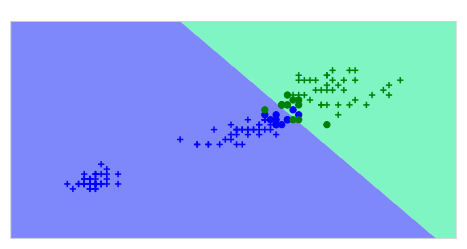

In [17]:
train_feature_name = ['sepal_length','sepal_width','petal_length','petal_width']
train_feature_name = train_feature_name[2:4]

cls = svm.SVC(kernel = "linear")
cls.fit(X[train_feature_name].values,y.values)
print ('准确率：%f' % (cls.score(X[train_feature_name].values,y.values)))
plot_hyperplane(cls, X[train_feature_name].values,y.values, h=0.01)

# 非线性

准确率：0.973333


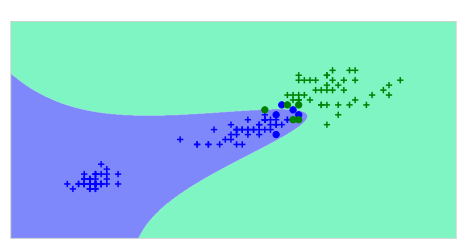

In [18]:
cls = svm.SVC(kernel = 'poly',gamma = 0.9,coef0=0,degree=4)
# γ通过gamma设置，默认值为1/特征维度； r通过coef0设置，默认值为0；，d通过degree设置，默认值为3 
cls.fit(X[train_feature_name].values,y.values)
print ('准确率：%f' % (cls.score(X[train_feature_name].values,y.values)))
plot_hyperplane(cls, X[train_feature_name].values,y.values, h=0.01)